In [212]:
# import das bibliotecas usadas no projeto

import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

# 1 - Leituras dos arquivos

In [213]:
# leitura do dataset 'base1.csv'

df1 = pd.read_csv('base1.csv', usecols=[1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11]) # droppa as colunas de índices 0 e 1 

df1.rename(columns={'Unnamed: 0': 'Person_id'}, inplace=True) # alterando o nome da coluna para algo mais legível

df1.head(10)

,Person_id,Age,Sex,Job,Housing,Saving accounts,Checking account,Credit amount,Duration,Purpose,Risk
0,104,26,male,2,rent,NaN,NaN,2445,12,car,good
1,360,61,male,2,free,NaN,moderate,1239,18,education,good
2,695,50,male,2,rent,quite rich,NaN,1236,6,car,good
3,902,42,male,2,free,NaN,NaN,10477,36,car,good
4,312,26,female,2,own,little,rich,3749,24,furniture/equipment,good
5,410,20,female,2,own,little,moderate,1967,24,radio/TV,good
6,832,29,male,2,rent,little,little,11816,45,business,bad
7,542,31,male,2,own,NaN,little,6350,30,furniture/equipment,bad
8,72,51,male,3,free,little,little,1164,8,vacation/others,good
9,672,42,male,3,own,little,NaN,10366,60,car,good


In [214]:
# leitura do dataset 'base2.csv'

df2 = pd.read_csv('base2.csv', usecols=[1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11])

df2.rename(columns={'Unnamed: 0': 'Person_id'}, inplace=True)

df2.tail(10)

,Person_id,Age,Sex,Job,Housing,Saving accounts,Checking account,Credit amount,Duration,Purpose,Risk
320,577,33,female,2,own,NaN,NaN,1927,24,education,good
321,496,29,male,3,rent,moderate,moderate,9034,36,furniture/equipment,bad
322,798,54,male,2,own,NaN,NaN,717,24,car,good
323,680,56,female,2,own,little,NaN,1538,6,education,good
324,718,31,male,2,own,NaN,rich,3148,24,radio/TV,good
325,467,32,male,2,own,NaN,NaN,7238,48,radio/TV,good
326,829,38,male,2,free,NaN,moderate,6681,48,business,good
327,296,20,female,2,rent,NaN,NaN,4675,12,car,good
328,235,30,male,3,own,little,little,1823,24,radio/TV,bad
329,633,19,female,2,rent,little,NaN,1980,9,furniture/equipment,bad


# 2 - Concatenação dos dados

Concatenando os dados num único df e verificando se possuem a mesma estrutura para uma concatenação adequada

In [215]:
concat_df = pd.concat([df1, df2], ignore_index=True)

display(concat_df)

,Person_id,Age,Sex,Job,Housing,Saving accounts,Checking account,Credit amount,Duration,Purpose,Risk
0,104,26,male,2,rent,NaN,NaN,2445,12,car,good
1,360,61,male,2,free,NaN,moderate,1239,18,education,good
2,695,50,male,2,rent,quite rich,NaN,1236,6,car,good
3,902,42,male,2,free,NaN,NaN,10477,36,car,good
4,312,26,female,2,own,little,rich,3749,24,furniture/equipment,good
...,...,...,...,...,...,...,...,...,...,...,...
995,467,32,male,2,own,NaN,NaN,7238,48,radio/TV,good
996,829,38,male,2,free,NaN,moderate,6681,48,business,good
997,296,20,female,2,rent,NaN,NaN,4675,12,car,good
998,235,30,male,3,own,little,little,1823,24,radio/TV,bad


In [216]:
# verificando as informações do df_concat

concat_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 11 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   Person_id         1000 non-null   int64 
 1   Age               1000 non-null   int64 
 2   Sex               1000 non-null   object
 3   Job               1000 non-null   int64 
 4   Housing           1000 non-null   object
 5   Saving accounts   817 non-null    object
 6   Checking account  606 non-null    object
 7   Credit amount     1000 non-null   int64 
 8   Duration          1000 non-null   int64 
 9   Purpose           1000 non-null   object
 10  Risk              1000 non-null   object
dtypes: int64(5), object(6)
memory usage: 86.1+ KB


# 3 - Tratamento de dados duplicados

Nesta etapa é verificado se há registros duplicados e caso tenha,são removidos deixando apenas a primeira ocorrencia

In [217]:
# verificando se há registros duplicados, considerando todas as colunas

concat_df.duplicated(keep=False) # parametro keep = false para visualizar todos os registros duplicados como True, caso houver

0      False
1      False
2      False
3      False
4      False
       ...  
995    False
996    False
997    False
998    False
999    False
Length: 1000, dtype: bool

In [218]:
# visualizando possíveis duplicatas na forma de um df

concat_df.loc[concat_df.duplicated()]

,Person_id,Age,Sex,Job,Housing,Saving accounts,Checking account,Credit amount,Duration,Purpose,Risk


Como podemos ver, o dataset resultante do append entre os dataframes não contém valores duplicados

# 4 - Tratamento de valores faltantes

Vamos agora identificar registros null e preenche-los com valores adequados 

## 4.1 - Criação de perfis do conjunto de dados

Primeiramente vamos verificar quais colunas possuem dados ausentes e como os dados estão distribuidos nelas com uma contagem das frequencias

In [220]:
# identificando quais colunas apresentam valores null
concat_df.isnull().sum()

Person_id             0
Age                   0
Sex                   0
Job                   0
Housing               0
Saving accounts     183
Checking account    394
Credit amount         0
Duration              0
Purpose               0
Risk                  0
dtype: int64

Como podemos ver acima, as colunas que possuem valores null são 'Saving accounts' e 'Checking account'.Vamos visualizar com um histograma como os dados delas estão distribuidos

## 4.1.1 - Perfil da coluna Saving accounts

In [221]:
# Forma 1: usando método .value_counts() - Os valores null foram preenchidos com 'null_value' para criacao de um bin 
# e aparecerem no plot do histograma
concat_df['Saving accounts']\
        .fillna('null_value')\
        .value_counts()

# Forma 2: agrupando por um contagem
#concat_df.groupby(by='Saving accounts')['Saving accounts'].agg('count')


Saving accounts
little        603
null_value    183
moderate      103
quite rich     63
rich           48
Name: count, dtype: int64

C:\Users\vinic\anaconda3\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


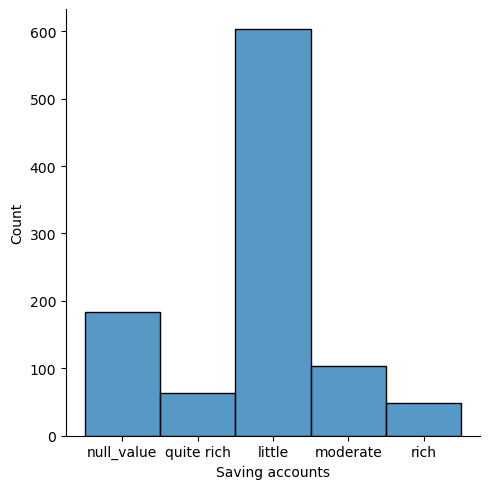

In [222]:
# perfil dos valores da coluna 'Saving accounts'
sns.displot(concat_df['Saving accounts'].fillna('null_value'))

## 4.1.2 - Perfil da coluna Checking account

In [223]:
concat_df['Checking account']\
        .fillna('null_value')\
        .value_counts()

Checking account
null_value    394
little        274
moderate      269
rich           63
Name: count, dtype: int64

C:\Users\vinic\anaconda3\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


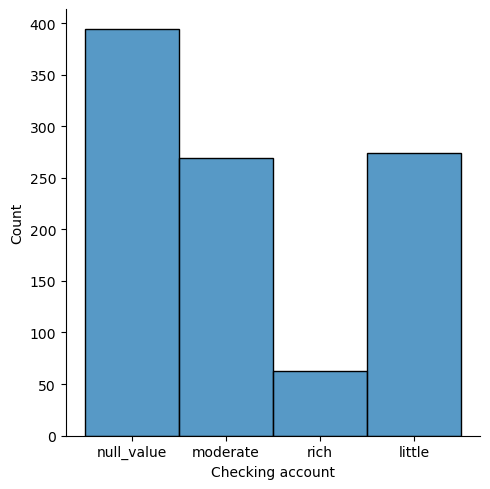

In [224]:
# perfil dos valores da coluna 'Saving accounts'
sns.displot(concat_df['Checking account'].fillna('null_value'))

## 4.1.3 - Substituindo os valores null

Para a coluna 'Saving account', como temos valores categóricos, sendo que o bin 'little' representa cerca de 60% (moda), preencheremos os valores na desssa coluna com 'little'.

Já para coluna 'Checking accounts', como temos uma quantidade significativa de valores null, o ideal seria escolher um método mais robusto para preencher esses valores (por exemplo um modelo de machine learning) ou conversar com a área de negócio a fim de entender se faz sentido ou não esses valores estarem ausentes ou até mesmo verificar com o(s) engenheiro(s) de dado(s) se não pode ser um possível problema nas cargas das tabelas.

Para propositos de estudos, preencheremos os valores da coluna 'Checking account' com valores aleatórios

In [225]:
# preenchendo a coluna 'Saving accounts' no df original com a moda 'little'

concat_df['Saving accounts'].fillna('little', inplace=True)

concat_df['Saving accounts'].value_counts()

Saving accounts
little        786
moderate      103
quite rich     63
rich           48
Name: count, dtype: int64

In [230]:
# preenchendo a coluna 'Checking accounts' no df original com valores aleatórios

# pegando as categorias distintas diferentes de NaN da coluna 'Saving account'
categorias = concat_df['Checking account'].dropna().unique()

# preenchendo com valores aleatórios caso a linha esteja null
concat_df['Checking account'].fillna(np.random.choice(categorias), inplace=True)

concat_df['Checking account'].value_counts()

Checking account
rich        457
little      274
moderate    269
Name: count, dtype: int64

C:\Users\vinic\anaconda3\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


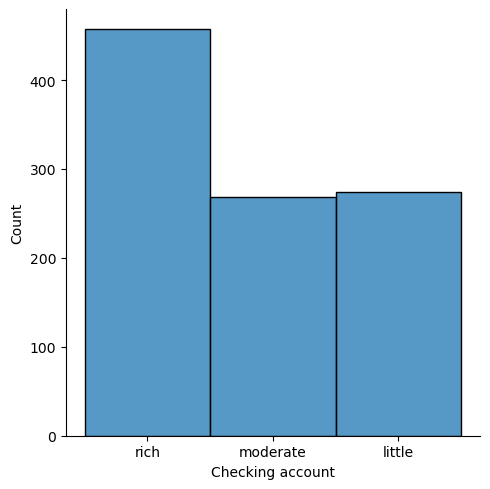

In [231]:
# verificando se a coluna Checking account teve os valores preenchidos
sns.displot(concat_df['Checking account'])

# 5 - Verificação de Outliers

Verificando de maneira gráfica se existem outliers nos dados por meio do IQR

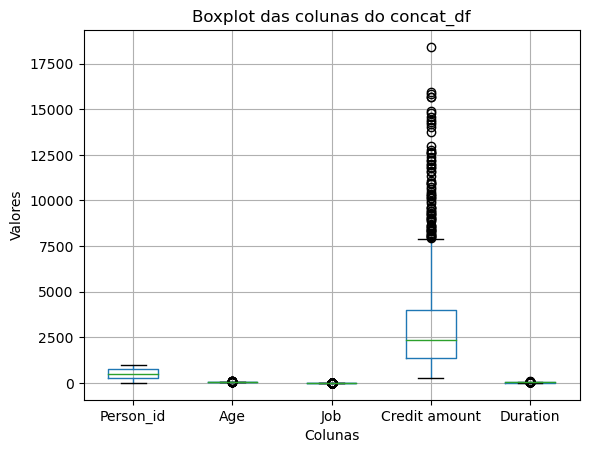

In [232]:
concat_df.boxplot()
plt.title('Boxplot das colunas do concat_df')
plt.xlabel('Colunas')
plt.ylabel('Valores')
plt.show()

Como é possível verificar, temos outliers na coluna

In [233]:
# intervalo entre Q1 e Q3

q1 = concat_df['Credit amount'].quantile(0.25) # primeiro quartil
q3 = concat_df['Credit amount'].quantile(0.75) # terceiro quartil

iqr = q3 - q1 # intervalo interquartilico

# limites inferior e superior

l_inferior = q1 - 1.5 * iqr

l_superior = q3 + 1.5 * iqr

# filtragem dos outliers no concat_df
outliers = concat_df[(concat_df['Credit amount'] > l_superior) | (concat_df['Credit amount'] < l_inferior)]

display(outliers)

,Person_id,Age,Sex,Job,Housing,Saving accounts,Checking account,Credit amount,Duration,Purpose,Risk
3,902,42,male,2,free,little,rich,10477,36,car,good
6,832,29,male,2,rent,little,little,11816,45,business,bad
9,672,42,male,3,own,little,rich,10366,60,car,good
37,291,28,male,3,rent,little,moderate,9398,36,car,bad
42,450,30,male,3,own,little,rich,11054,36,car,good
...,...,...,...,...,...,...,...,...,...,...,...
914,657,37,male,2,own,little,rich,10222,48,radio/TV,good
936,395,32,male,2,rent,moderate,moderate,11760,39,education,good
940,818,43,male,3,own,little,little,15857,36,vacation/others,good
967,653,42,male,3,own,moderate,moderate,8086,36,car,bad


Como os 72 registros representam cerca de 7% do nosso dataset, talvez a melhor forma de lidar com eles não seja droppando eles, mas sim aplicando algum tipo de transformação / normalização dos registros ou substituir eles por algum outro valor